# Decision Trees

These are binary trees consisting of nodes and leaves, also known as \terminal nodes. Each non-terminal node has two branches. A sample enters the tree at the root node at the top. At each node, a decision is made based on the value of a single feature. If the feature is continuous, the decision is based on the question, whether the value is larger or smaller than a threshold. The sample traverses the tree down to a leaf. Each leaf is associated with a class. Hence, the sample is assigned the class of the leaf it ends up in.

Decision trees are grown recursively from a training set. There are many possible ways the tree can grow. At each node, the set of training samples which reached that node is split in two. Each of the two subsets is passed down one of the branches to the child nodes. At each node, we need to choose the feature on which to base the split, and the threshold.

A node is called pure, if it only contains samples of one class. This naturally becomes a leaf. However, not all leaves are pure nodes. Each split should reduce the impurity in the children and make the nodes purer than the parent.  The impurity measure needs to have certain properties.

*   Zero for pure nodes.
*   Maximal for equal proportions.
*   Symmetric, if the classes are re-labeled.

Let $p_{tk}$ be the proportion of samples of class $k$ at node $t$.

The Gini Diversity Index (gdi) measures the impurity as
\begin{equation}
\sum_{k=1}^K p_{tk}(1-p_{tk}) = 1 - \sum_{k=1}^K p_{tk}^2,
\end{equation}
since $\sum_{k=1}^K p_{tk} = 1$. It vanishes, if $p_{tk} = 1$ for some $k$, and zero for all others.

The deviance}, also known as cross-entropy, entropy or log loss, chooses
\begin{equation}
- \sum_{k=1}^K p_{tk}\log p_{tk}.
\end{equation}

Change the minimum number of samples needed in a node to split and the minimum number of samples per leaf node and observe the different outcomes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
d = datasets.load_iris()
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# Iris virginica stored in the next 50 entries.

# Create a classification instance of the SVM.
t = DecisionTreeClassifier(
            criterion = 'gini',     # Impurity measure.
            min_samples_split = 5,  # Minimum to split.
            min_samples_leaf = 2)   # Minum in leaf.

# We consider sepal length and width, the first and second features.
# We consider petal length and width, the third and forth features.
# We train on the entire data.
# Number of samples, and therefore species.
# Two: 100,
# Three: 150
n = 150
X = d.data[0:n, 0:2] # Features 1 and 2.
y = d.target[0:n]
# Fit model.
t = t.fit(X, y)

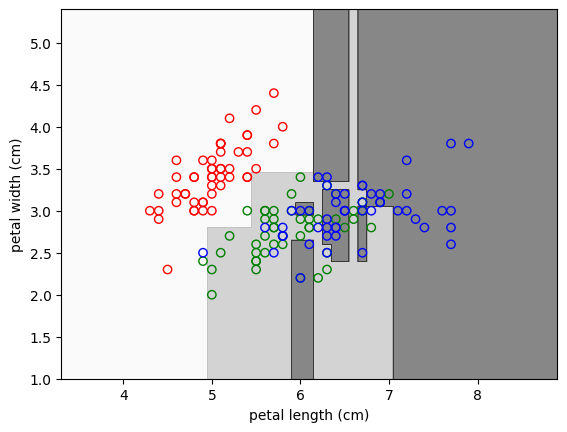

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
# Draw decision boundaries.
disp = DecisionBoundaryDisplay.from_estimator(
    t, X, grid_resolution =1000,
    response_method='predict',
    plot_method = 'contourf',
    xlabel=d.feature_names[2], ylabel=d.feature_names[3],
    cmap = 'Greys',
    alpha = 0.5
)
# Display data.
disp.ax_.scatter(X[:,0], X[:,1],
                     facecolors = 'none',
                     edgecolors = colours[0:n])

plt.show()

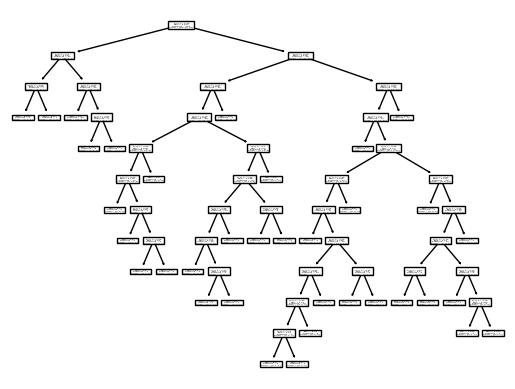

In [4]:
# Display tree.
tree.plot_tree(t)
plt.show()